In [10]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
dtype = torch.FloatTensor

In [12]:
np.random.seed(1)

In [15]:
Input, Hidden, Output = 7, 6, 1
time_steps = 10
lr = 0.2
series = np.linspace(2, 5, time_steps)
y = np.sin(series)
y.resize((time_steps, 1))
x = Variable(torch.Tensor(y[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(y[1:]).type(dtype), requires_grad=False)

In [17]:
lim = np.sqrt(6) / (np.sqrt(Input + Hidden))
w1 = np.random.uniform(-lim, lim, [Input, Hidden])
w1 = Variable(torch.from_numpy(w1).type(dtype), requires_grad=True)
lim = np.sqrt(6) / (np.sqrt(Output + Hidden))
w2 = np.random.uniform(-lim, lim, [Hidden, Output])
w2 = Variable(torch.from_numpy(w2).type(dtype), requires_grad=True)
hidden_prev = torch.zeros((1, Hidden)).type(dtype)

In [19]:
def forward(x, w1, w2):
  h = torch.tanh(Variable(x).mm(w1))
  return   (h.mm(w2), h)

In [20]:
for iter in range(5000):

  i = iter % x.size(0)
  variable_y = y[i:(i+1)]
  current_x = x[i:(i+1)].data
  xh = torch.cat([current_x, hidden_prev], 1)
  variable_x = xh

  variable_h = hidden_prev

  (y_pred, h) = forward(variable_x, w1, w2)
  loss = (y_pred - variable_y).pow(2).sum() /2
  print("Iteration: {} loss {}".format(iter, loss.data[0]))

  loss.backward()

  w1.data -= lr * w1.grad.data
  w2.data -= lr * w2.grad.data

  w1.grad.data.zero_()
  w2.grad.data.zero_()

  hidden_prev = h.data


Iteration: 0 loss 0.19210629165172577
Iteration: 1 loss 0.019915424287319183
Iteration: 2 loss 0.01110519003123045
Iteration: 3 loss 0.17807340621948242
Iteration: 4 loss 0.32744958996772766
Iteration: 5 loss 0.3535630702972412
Iteration: 6 loss 0.3489038944244385
Iteration: 7 loss 0.34230008721351624
Iteration: 8 loss 0.1624162644147873
Iteration: 9 loss 0.07812252640724182
Iteration: 10 loss 0.24880769848823547
Iteration: 11 loss 0.053218234330415726
Iteration: 12 loss 0.006281490903347731
Iteration: 13 loss 0.0030343809630721807
Iteration: 14 loss 0.02369621768593788
Iteration: 15 loss 0.04516874626278877
Iteration: 16 loss 0.04343652352690697
Iteration: 17 loss 0.015245827846229076
Iteration: 18 loss 0.013658401556313038
Iteration: 19 loss 0.16444964706897736
Iteration: 20 loss 0.06959597021341324
Iteration: 21 loss 0.03560473024845123
Iteration: 22 loss 0.016898678615689278
Iteration: 23 loss 0.02910904586315155
Iteration: 24 loss 0.04097263514995575
Iteration: 25 loss 0.028197847

In [26]:
predictions = []
for index, inp in enumerate(x):
  xh = torch.cat([inp.view(1, 1).data, hidden_prev], 1)  
  (pred, hidden_prev) = forward(xh, w1, w2)
  hidden_prev = hidden_prev.data
  predictions.append(pred.data.numpy().ravel()[0])

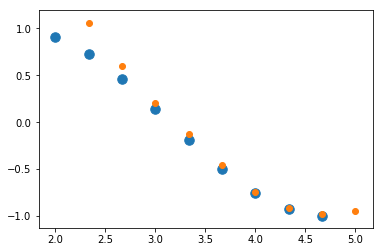

In [27]:
pl.scatter(series[:-1] , x.data.numpy(), s=90)
pl.scatter(series[1:], predictions)
pl.show()